In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (10000, 2)
y shape: (10000,)


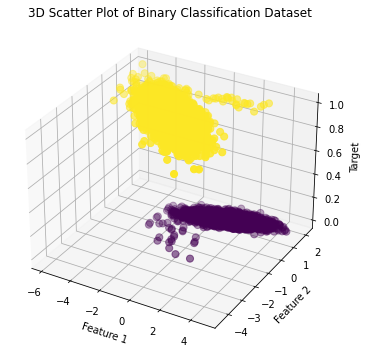

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

feature1 = X[:, 0]
feature2 = X[:, 1]
ax.scatter(feature1, feature2, y, c=y, cmap='viridis', s=50)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.title('3D Scatter Plot of Binary Classification Dataset')
plt.show()

In [118]:
class Perceptron:
    activations = {
        "sigmoid": lambda x: (1 / (1 + np.exp(-x)))
    }

    def __init__(self, input_shape, activation='sigmoid'):
        self.w = np.random.random((input_shape, 1))
        self.b = np.random.random((1,))
        self.activation = activation
        
    def output(self, input):
        return self.activations.get(self.activation)(input.dot(self.w) + self.b)

class Layer:
    activations = {
        "sigmoid": lambda x: (1 / (1 + np.exp(-x)))
    }

    def __init__(self, num_neuron, input, activation="sigmoid"):
        self.num_neuron = num_neuron
        self.input_shape = input if len(input) == 3 else (1, input[0], input[1])
        self.w = np.random.random((self.input_shape[1], self.num_neuron))
        print("wieghts: ", self.w.shape)
        self.b = np.random.random(( self.num_neuron, 1)) * np.ones((1, self.input_shape[0]))
        self.b = self.b.reshape(self.b.shape[0], self.b.shape[1], 1)
        print("bais: ", self.b.shape)
        self.activation = activation
        self.output_shape = (self.input_shape[0], self.num_neuron, 1)

    def output(self, input):
        input = input if len(input.shape) == 3 else input.reshape((1, input.shape[0], input.shape[1]))
        out = self.w.T.dot(input) + self.b
        out = out.reshape((out.shape[1], out.shape[0], out.shape[2]))
        return out

class Model:
    def __init__(self):
        self.layers = []
    def add_layer(self, num_neuron, input_shape=None, activation="sigmoid"):
        if input_shape == None: input_shape = self.layers[-1].output_shape
        self.layers.append(Layer(num_neuron, input_shape, activation))
    def forward(self, x):
        out = x
        for y, layer in enumerate(self.layers):
            out = layer.output(out)
            print(f"the shape of the int layer {y}: ", layer.input_shape)
            print(f"the shape of the out layer {y}: ", layer.output_shape)
        return out

In [124]:
X = X.reshape(X.shape[0], X.shape[1], 1)
X[:1].shape

(1, 2, 1)

In [122]:
model = Model()
model.add_layer(3, X[:1].shape)
model.add_layer(16)
model.add_layer(5)
model.add_layer(1)

wieghts:  (2, 3)
bais:  (3, 1, 1)
wieghts:  (3, 16)
bais:  (16, 1, 1)
wieghts:  (16, 5)
bais:  (5, 1, 1)
wieghts:  (5, 1)
bais:  (1, 1, 1)


In [123]:
model.forward(X[:1])

the shape of the int layer 0:  (1, 2, 1)
the shape of the out layer 0:  (1, 3, 1)
the shape of the int layer 1:  (1, 3, 1)
the shape of the out layer 1:  (1, 16, 1)
the shape of the int layer 2:  (1, 16, 1)
the shape of the out layer 2:  (1, 5, 1)
the shape of the int layer 3:  (1, 5, 1)
the shape of the out layer 3:  (1, 1, 1)


array([[[-12.30887808]]])

In [71]:
mylayer = Layer(3, X[:4].shape)
res = mylayer.output(X[:4])
res.shape

wieghts:  (2, 3)
bais:  (3, 4, 1)


(4, 3, 1)

In [73]:
mylayer2 = Layer(1, res.shape)

wieghts:  (3, 1)
bais:  (1, 4, 1)


In [75]:
mylayer2.output(res).shape

(4, 1, 1)